# 各类燃弧分布分析

In [1]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [8]:
res_path = '../res/'
n_clusters = 5
n_machines = 10
res_df = pd.read_csv(res_path + '2_cluster_' + str(n_clusters) + '.csv')

In [9]:
machine_group = res_df.groupby('machine_id')

### 方式一、各类燃弧累计出现的频率分布

In [10]:
# 计算各类燃弧累计出现的频率
labels_columns = ['machine_id'] + [str(i) + str(j) for i in range(n_clusters) for j in ['', '_frequency']]
print(labels_columns)
label_occ_count_df = pd.DataFrame(columns = labels_columns)

for machine_id in range(1, n_machines + 1):
    tmp_machine_df = machine_group.get_group(machine_id).reset_index(drop = True)
    len_operations = len(tmp_machine_df)
    for idx in tmp_machine_df.index:
        tmp_label_counts = [machine_id]
        tmp_df = tmp_machine_df[0 : idx + 1]
        for label in range(n_clusters):
            tmp_count = len(tmp_df[tmp_df['label'] == label])
            tmp_label_counts += [tmp_count, tmp_count / (idx + 1)]
        label_occ_count_df = label_occ_count_df.append(pd.DataFrame([tmp_label_counts], columns = labels_columns), ignore_index = True)

['machine_id', '0', '0_frequency', '1', '1_frequency', '2', '2_frequency', '3', '3_frequency', '4', '4_frequency']


In [17]:
label_occ_count_df.head(10)

machine_id  0  0_frequency  1  1_frequency  2  2_frequency  3  3_frequency  \
0          1  1     1.000000  0     0.000000  0          0.0  0     0.000000   
1          1  1     0.500000  0     0.000000  0          0.0  1     0.500000   
2          1  1     0.333333  1     0.333333  0          0.0  1     0.333333   
3          1  2     0.500000  1     0.250000  0          0.0  1     0.250000   
4          1  2     0.400000  2     0.400000  0          0.0  1     0.200000   
5          1  2     0.333333  2     0.333333  0          0.0  2     0.333333   
6          1  3     0.428571  2     0.285714  0          0.0  2     0.285714   
7          1  3     0.375000  3     0.375000  0          0.0  2     0.250000   
8          1  3     0.333333  3     0.333333  0          0.0  3     0.333333   
9          1  3     0.300000  3     0.300000  0          0.0  4     0.400000   

   4  4_frequency  
0  0          0.0  
1  0          0.0  
2  0          0.0  
3  0          0.0  
4  0          0.0  
5  0          0.0  
6  0          0.0  
7  0          0.0  
8  0          0.0  
9  0          0.0

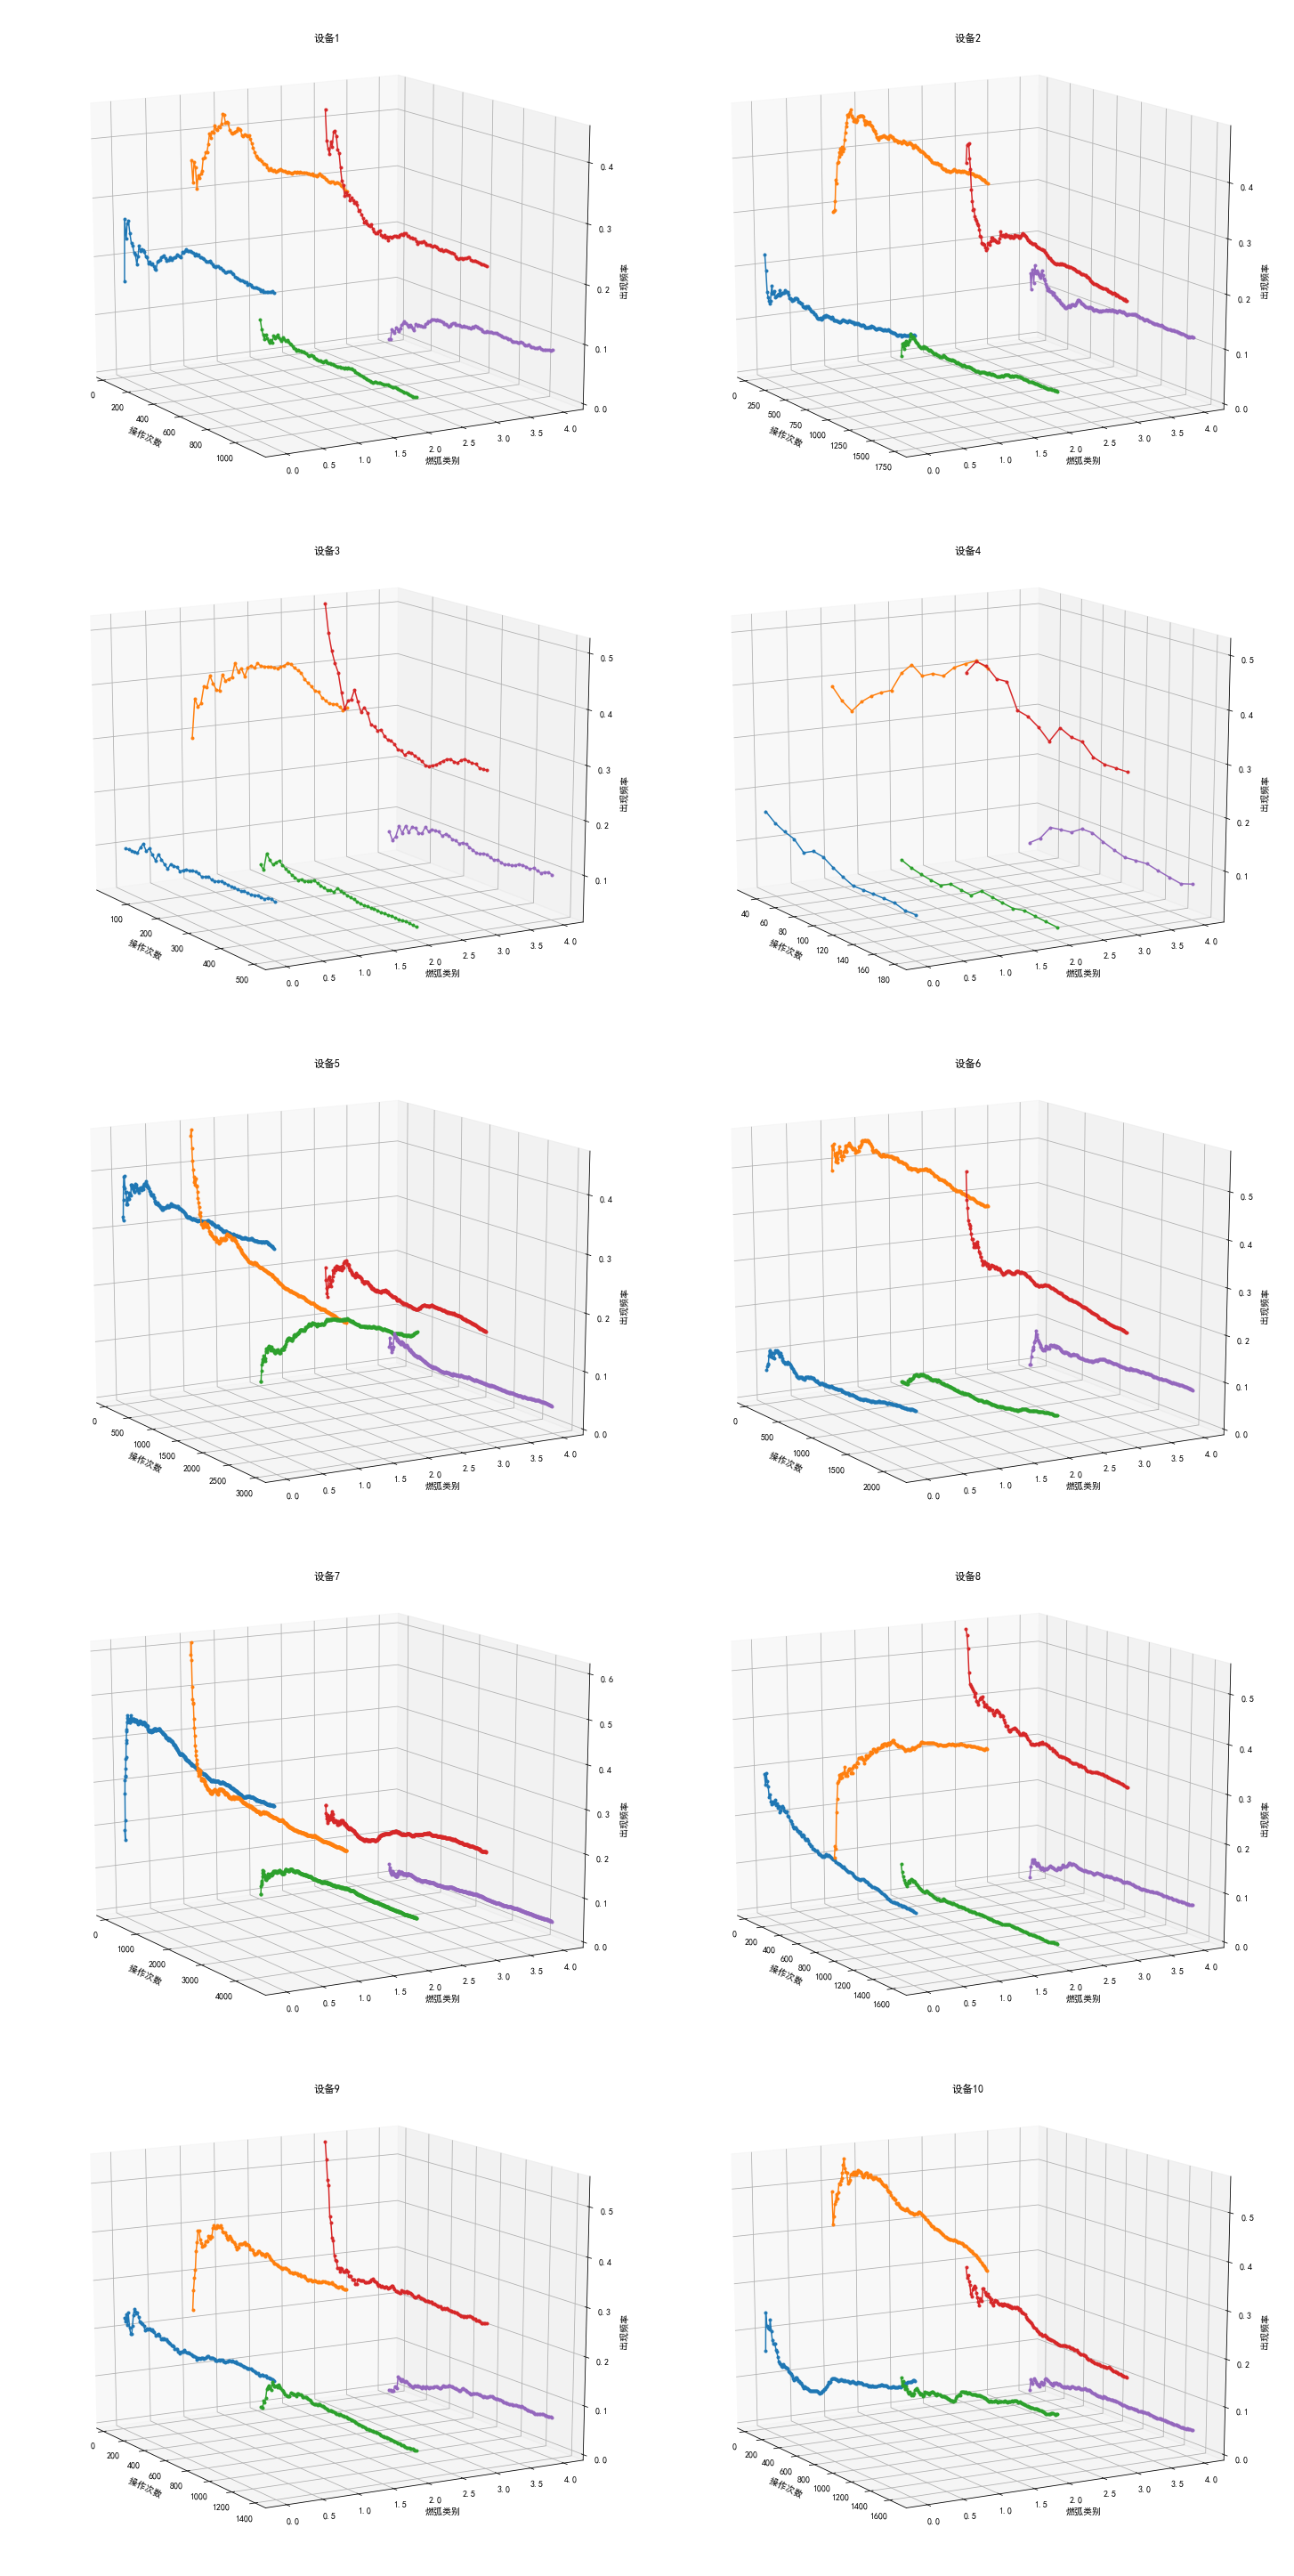

In [15]:
fig = plt.figure(figsize= (20, 40))
plt.subplots_adjust(top=1,bottom=0,left=0,right=1,hspace=0,wspace=0)
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
for i in range(1, 11):
    ax = fig.add_subplot(5,2, i, projection='3d')

    label_frequency_columns = [str(label) + '_frequency' for label in range(n_clusters)]
    machine_df = label_occ_count_df.groupby('machine_id').get_group(i).reset_index(drop = True)
    for z in range(n_clusters):
        xs = np.arange(30, len(machine_df), 10)
        ys = machine_df.loc[xs][str(z) + '_frequency'].tolist()
        ax.plot(xs, ys, zs = z, zdir='y',marker = '.')

    ax.set_xlabel(u'操作次数    ')
    ax.set_ylabel(u'燃弧类别')
    ax.set_zlabel(u'出现频率    ')
    ax.set_title('设备' + str(i))
    ax.view_init(15, -30)
#plt.savefig('../fig/类别数'+str(n_clusters)+'分布图1.png',dpi = 100)
plt.show()

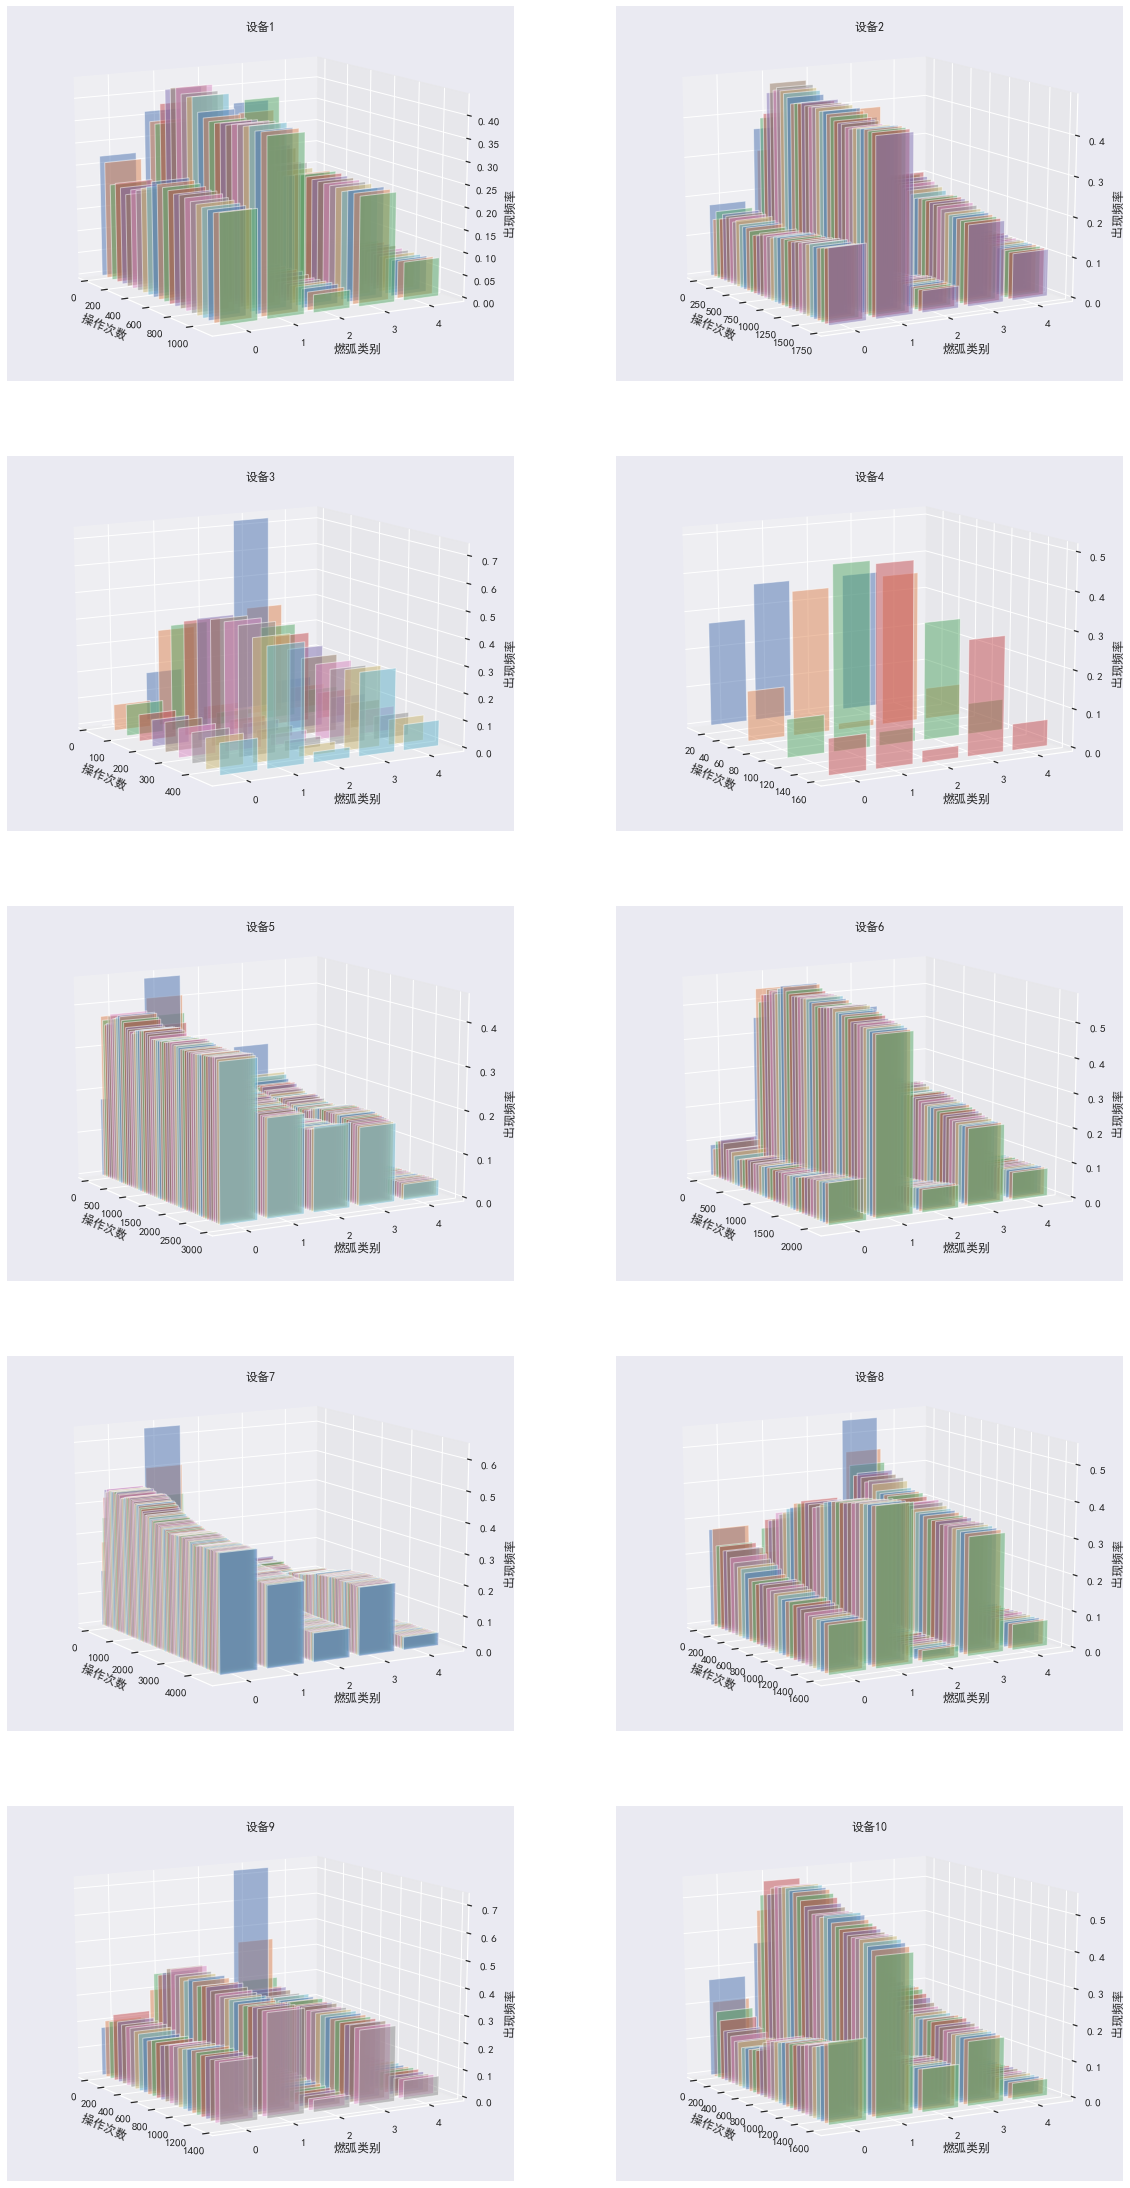

In [220]:
fig = plt.figure(figsize= (20, 40))
for i in range(1, 11):
    ax = fig.add_subplot(5,2, i, projection='3d')

    label_frequency_columns = [str(label) + '_frequency' for label in range(n_clusters)]
    machine_df = label_occ_count_df.groupby('machine_id').get_group(i).reset_index(drop = True)
    for z in range(10, len(machine_df), 50):
        xs = np.arange(n_clusters)
        ys = machine_df.loc[z][label_frequency_columns].tolist()
        ax.bar(xs, ys, zs = z, zdir='x', alpha = 0.5)

    #ax.view_init(10, -15)
    ax.set_xlabel(u'操作次数    ')
    ax.set_ylabel(u'燃弧类别')
    ax.set_zlabel(u'出现频率    ')
    ax.set_title('设备' + str(i))
    ax.view_init(15, -30)
#plt.savefig('../fig/类别数'+str(n_clusters)+'分布图2.png',dpi = 100)
plt.show()

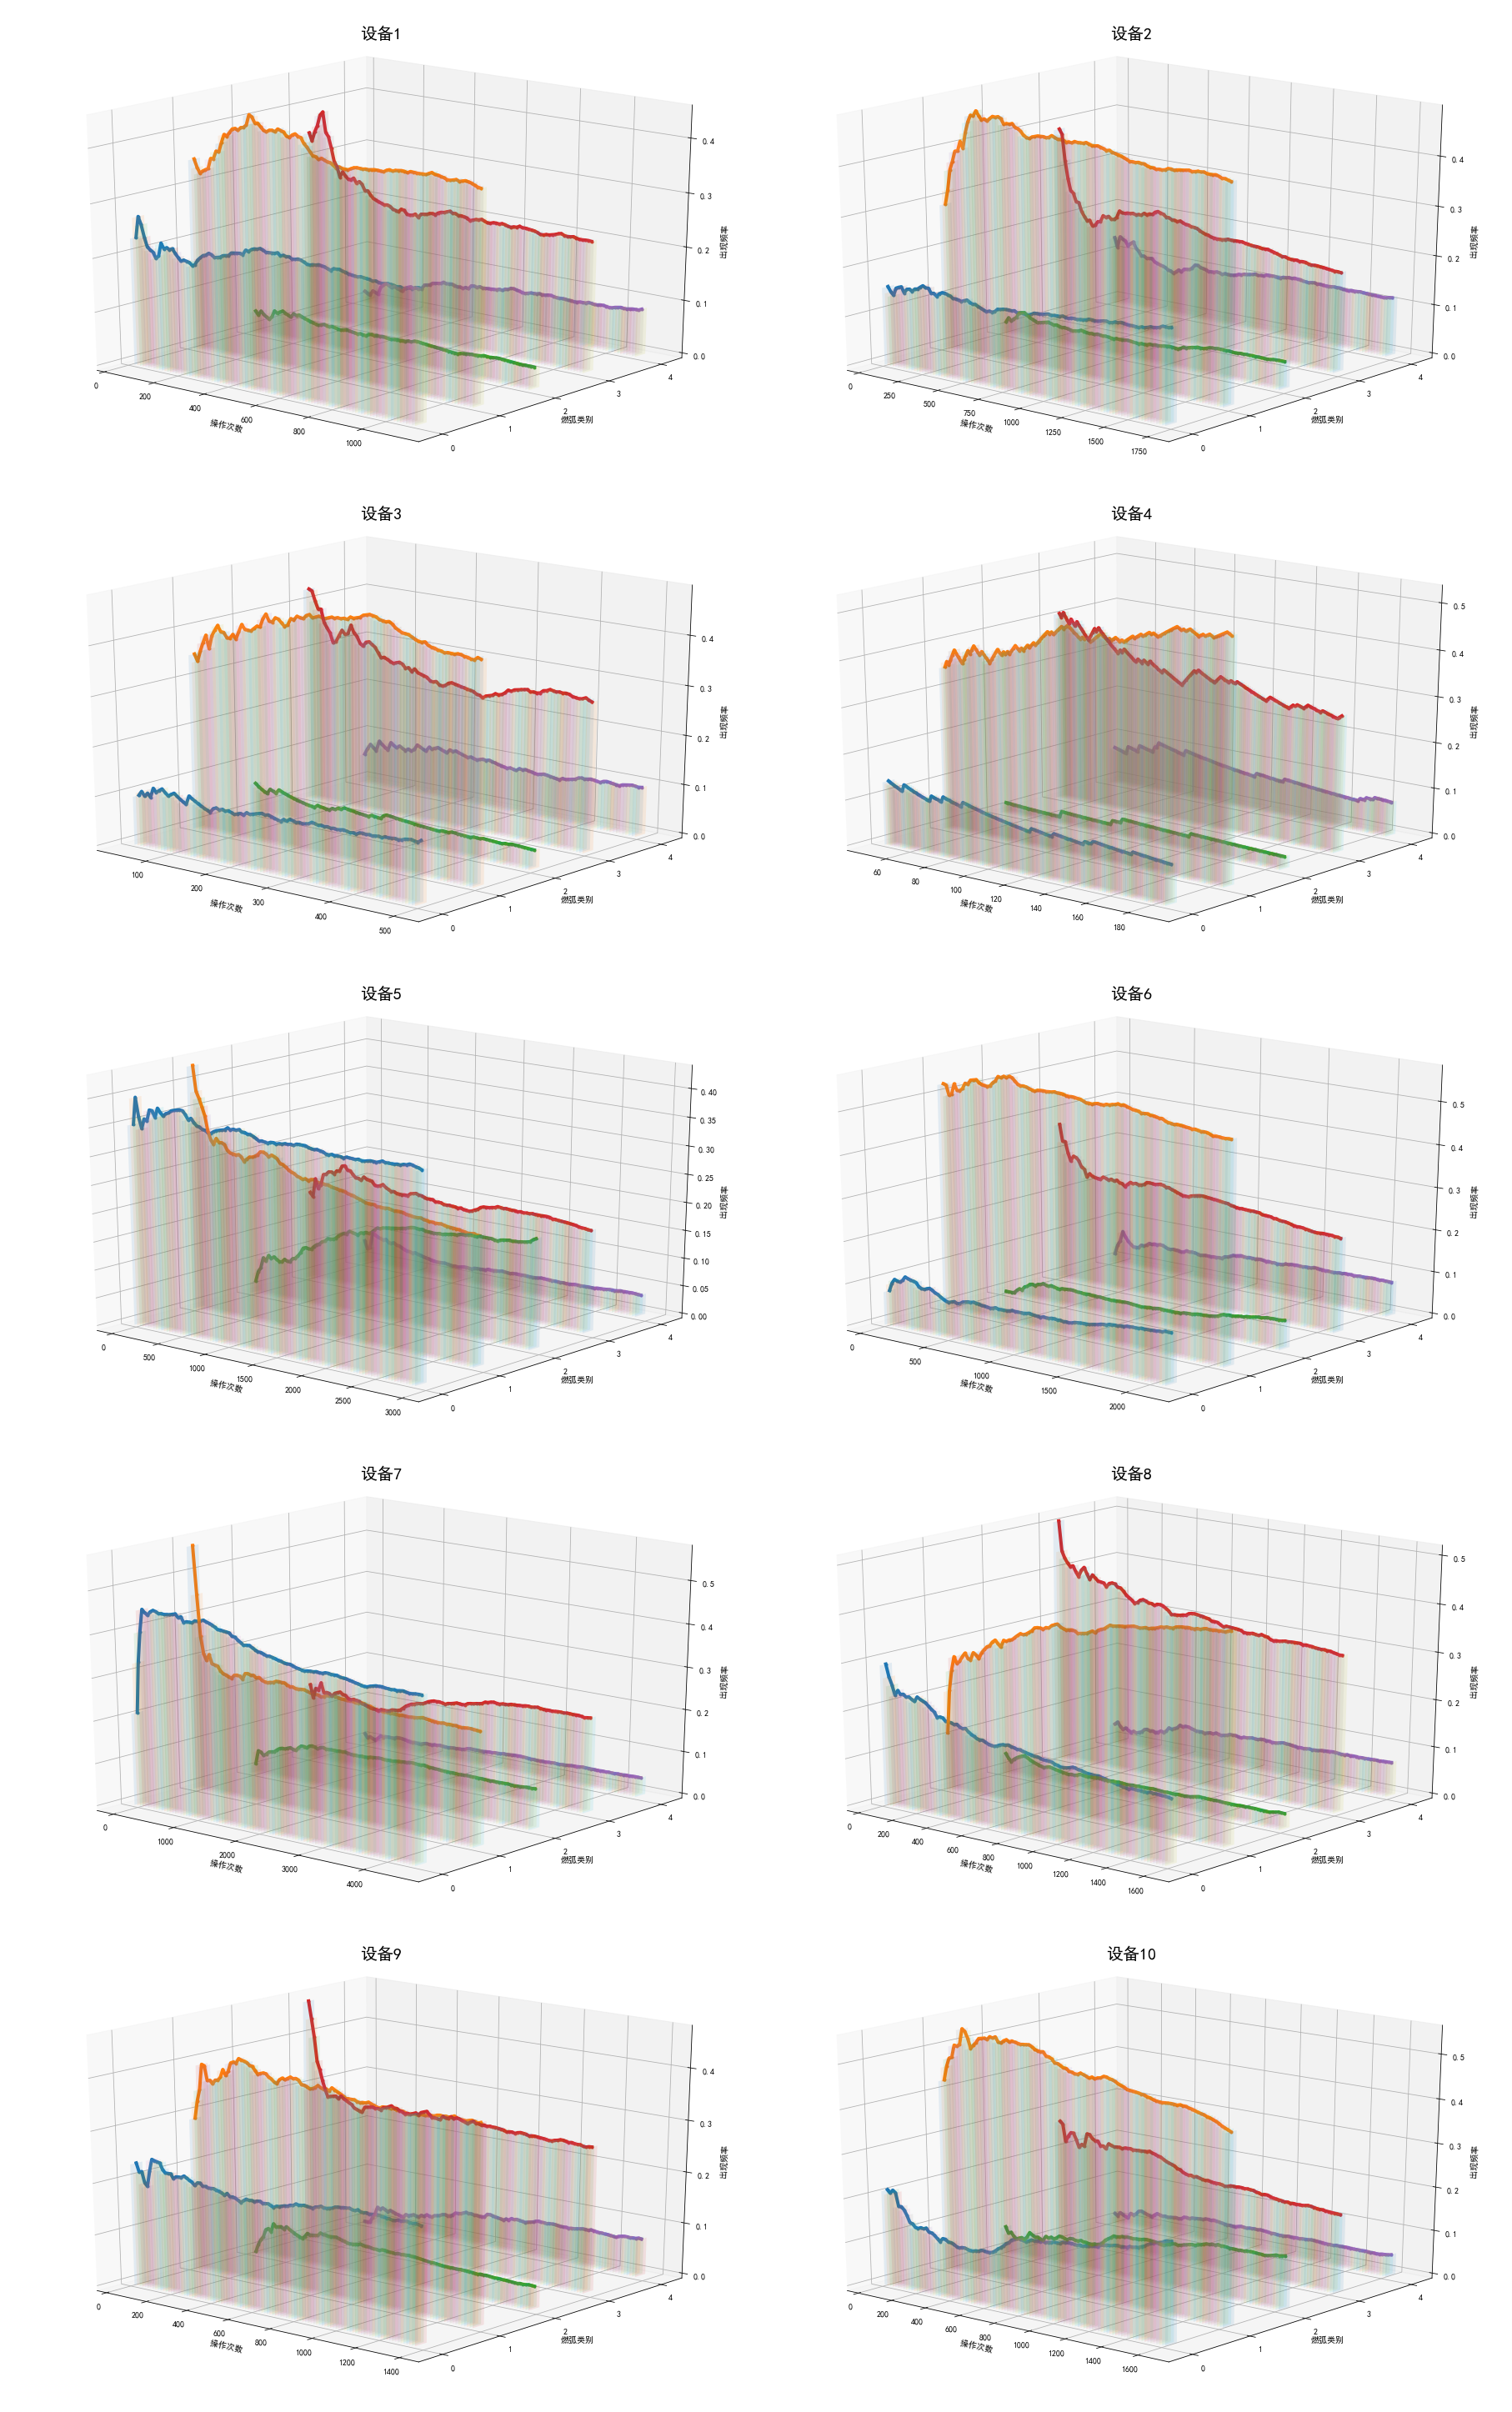

In [16]:
'''
各类燃弧累计出现的频率分布
'''
fig = plt.figure(figsize= (25, 40))
plt.subplots_adjust(top=1,bottom=0,left=0,right=1,hspace=0,wspace=0)
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
for i in range(1, 11):
    ax = fig.add_subplot(5,2, i, projection='3d')

    label_frequency_columns = [str(label) + '_frequency' for label in range(n_clusters)]
    machine_df = label_occ_count_df.groupby('machine_id').get_group(i).reset_index(drop = True)
    machine_range = np.arange(50, len(machine_df), int(len(machine_df)/100))
    #绘制柱状图
    for z in machine_range:
        xs = np.arange(n_clusters)
        ys = machine_df.loc[z][label_frequency_columns].tolist()
        ax.bar(xs, ys, zs = z, zdir='x', alpha = 0.1, linewidth = 0, width = 0.2)

    ax.view_init(20, -50)#(10, -15)

    #绘制折线图
    for z in range(n_clusters):
        xs = machine_range
        ys = machine_df.loc[xs][str(z) + '_frequency'].tolist()
        ax.plot(xs, ys, zs = z, zdir='y',marker = '.',linewidth = 4)
    ax.set_xlabel(u'操作次数    ')
    ax.set_ylabel(u'燃弧类别')
    ax.set_yticks(np.arange(n_clusters)) #设置刻度
    ax.set_zlabel(u'出现频率    ')
    ax.set_title('设备' + str(i), fontsize=20)
plt.savefig('../fig/类别数'+str(n_clusters)+'分布图.png',dpi = 100)
plt.show()

### 方式二、计算各类燃弧在滑动窗口中出现的频率分布情况

In [ ]:
# 计算各类燃弧在滑动窗口中出现的频率
win_size = 50
win_stride = int(win_size / 2)

label_occ_count_df = pd.DataFrame(columns = labels_columns)
for machine_id in range(1, 11):
    tmp_machine_df = machine_group.get_group(machine_id).reset_index(drop = True)
    len_operations = len(tmp_machine_df)
    for idx in tmp_machine_df.index:
        tmp_label_counts = [machine_id]
        tmp_df = tmp_machine_df[idx - win_size : idx + 1]
        for label in range(n_clusters):
            tmp_count = len(tmp_df[tmp_df['label'] == label])
            tmp_label_counts += [tmp_count, tmp_count / (idx + 1)]
        label_occ_count_df = label_occ_count_df.append(pd.DataFrame([tmp_label_counts], columns = labels_columns), ignore_index = True)

In [ ]:
'''
各类燃弧在滑动窗口内出现的频率分布
'''
fig = plt.figure(figsize= (25, 40))
plt.subplots_adjust(top=1,bottom=0,left=0,right=1,hspace=0,wspace=0)
for i in range(1, 11):
    ax = fig.add_subplot(5,2, i, projection='3d')

    label_frequency_columns = [str(label) + '_frequency' for label in range(n_clusters)]
    machine_df = label_occ_count_df.groupby('machine_id').get_group(i).reset_index(drop = True)
    machine_range = np.arange(50, len(machine_df), int(len(machine_df)/100))
    #绘制柱状图
    for z in machine_range:
        xs = np.arange(n_clusters)
        ys = machine_df.loc[z][label_frequency_columns].tolist()
        ax.bar(xs, ys, zs = z, zdir='x', alpha = 0.1, linewidth = 0, width = 0.2)

    ax.view_init(20, -50)#(10, -15)

    #绘制折线图
    for z in range(n_clusters):
        xs = machine_range
        ys = machine_df.loc[xs][str(z) + '_frequency'].tolist()
        ax.plot(xs, ys, zs = z, zdir='y',marker = '.',linewidth = 4)
    ax.set_xlabel(u'操作次数    ')
    ax.set_ylabel(u'燃弧类别')
    ax.set_yticks(np.arange(n_clusters)) #设置刻度
    ax.set_zlabel(u'出现频率    ')
    ax.set_title('设备' + str(i), fontsize=20)
plt.savefig('../fig/类别数'+str(n_clusters)+'分布图.png',dpi = 100)
plt.show()

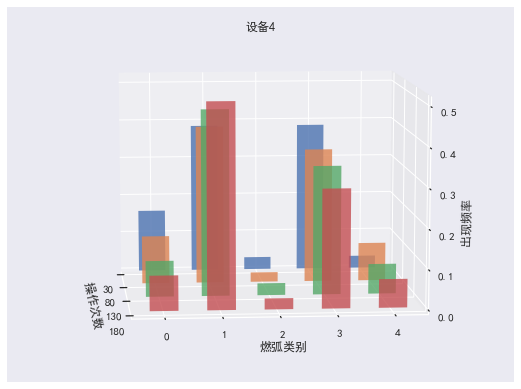

In [66]:
fig = plt.figure(figsize= (20, 40))
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
for i in [4]:#range(1, 11):
    ax = fig.add_subplot(5,2, i, projection='3d')

    label_frequency_columns = [str(label) + '_frequency' for label in range(n_clusters)]
    machine_df = label_occ_count_df.groupby('machine_id').get_group(i).reset_index(drop = True)
    for z in range(30, len(machine_df), 50):
        xs = np.arange(n_clusters)
        ys = machine_df.loc[z][label_frequency_columns].tolist()
        ax.bar(xs, ys, zs = z, zdir='x', alpha = 0.8, linewidth = 0, width = 0.5)

    ax.view_init(10, -5)

    
    ax.set_xlabel(u'操作次数    ')
    ax.set_ylabel(u'燃弧类别')
    ax.set_zlabel(u'出现频率    ')
    ax.set_title('设备' + str(i))
    ax.set_xticks(np.arange(30, 200, 50)) 
#plt.savefig('../fig/类别数'+str(n_clusters)+'分布图.png',dpi = 100)
plt.show()

In [59]:
len(X_tsne[(X_tsne['machine_id'] == 1) & (X_tsne['label'] == 1)])

440

In [76]:

        tmp = [machine_id, label, len(X_tsne[(X_tsne['machine_id'] == machine_id) & (X_tsne['label'] == label)])]
        tmp_df = pd.DataFrame([tmp], columns =['machine_id','label','count'])
        stat_res_df = stat_res_df.append(tmp_df, ignore_index = True)
        print(machine_id, label, len(X_tsne[(X_tsne['machine_id'] == machine_id) & (X_tsne['label'] == label)]))

machine_id label count
0           1     0   101
1           1     1   440
2           1     2   274
3           1     3   274
4           1     4    47
5           2     0   208
6           2     1   766
7           2     2   352
8           2     3   331
9           2     4    96
10          3     0    50
11          3     1   223
12          3     2   153
13          3     3    64
14          3     4    19
15          4     0    14
16          4     1    99
17          4     2    56
18          4     3    16
19          4     4     5
20          5     0   109
21          5     1   672
22          5     2   538
23          5     3  1071
24          5     4   581
25          6     0   172
26          6     1  1107
27          6     2   479
28          6     3   254
29          6     4   147
30          7     0   191
31          7     1  1191
32          7     2   999
33          7     3  1717
34          7     4   423
35          8     0   116
36          8     1   707
37          8     2   530
38          8     3   217
39          8     4    52
40          9     0   102
41          9     1   530
42          9     2   391
43          9     3   309
44          9     4    61
45         10     0    80
46         10     1   706
47         10     2   292
48         10     3   374
49         10     4   199

In [53]:
X_clustered.head()

A_arcing_duration  A_arcing_energy  A_arcing_electricity  A_arcing_power  \
0           0.625613         0.439489              0.321820        0.528864   
1           0.220002         0.027694              0.668268        0.308239   
2          -0.628093        -0.805137             -0.664126       -0.574403   
3           0.478118         0.222672              0.428571        0.355542   
4          -0.775588        -0.908806             -0.874971       -0.739541   

   B_arcing_duration  B_arcing_energy  B_arcing_electricity  B_arcing_power  \
0           0.659079         0.756005              1.387272        0.787895   
1          -1.672671        -1.524703             -1.737356       -1.880570   
2           0.879055         0.580103             -0.002780        0.349130   
3           0.395107         0.372876              0.916370        0.539142   
4           0.703074         0.319623              0.081195        0.167777   

   C_arcing_duration  C_arcing_energy  C_arcing_electricity  C_arcing_power  \
0          -1.064511        -1.264814             -1.256825       -1.233994   
1           0.146356        -0.124915              0.185927        0.032838   
2           0.814420         0.984374              1.569350        0.878038   
3          -1.482051        -1.471305             -1.587111       -1.727110   
4           0.605650         0.872720              1.331213        0.972378   

   label  
0      0  
1      3  
2      1  
3      0  
4      1

In [50]:
X.shape

(17900, 12)

In [51]:
X['label'] = X_clustered[:-5]['label']

D:\Env\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [72]:
X.shape, tot_arcing_df.shape

((17900, 13), (17900, 19))

In [73]:
X['machine_id'] = tot_arcing_df['machine_id']

D:\Env\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
X.head()

A_arcing_duration  A_arcing_energy  A_arcing_electricity  A_arcing_power  \
0                 64    677339.277890          2.014985e+06    10420.604275   
1                 53    510981.531539          2.418419e+06     9462.620954   
2                 30    174532.266319          8.668625e+05     5630.073107   
3                 60    589748.905774          2.139295e+06     9668.014849   
4                 26    132651.607727          6.213363e+05     4913.022508   

   B_arcing_duration  B_arcing_energy  B_arcing_electricity  B_arcing_power  \
0                 65    811300.544782          3.491806e+06    12292.432497   
1                 12     23718.359796          7.483898e+04     1824.489215   
2                 70    750557.290086          1.971701e+06    10571.229438   
3                 59    678996.806536          2.976846e+06    11316.613442   
4                 66    660607.538014          2.063533e+06     9859.814000   

   C_arcing_duration  C_arcing_energy  C_arcing_electricity  C_arcing_power  \
0                 24    100350.176043          4.943662e+05     4014.007042   
1                 53    477679.549880          2.113334e+06     8845.917590   
2                 69    844876.016428          3.665727e+06    12069.657378   
3                 14     31997.703587          1.237393e+05     2133.180239   
4                 64    807916.392832          3.398504e+06    12429.482967   

   label  machine_id  
0      0           1  
1      3           1  
2      1           1  
3      0           1  
4      1           1

In [76]:
X.to_csv('res_cluster.csv', index = False, header = True)

In [77]:
tmp_group = X.groupby('machine_id')

In [83]:
X_group_cols =  ['operation_times'] + X.columns.tolist()

In [84]:
X_group = pd.DataFrame([], columns = X_group_cols)

In [85]:
X_group

Empty DataFrame
Columns: [operation_times, A_arcing_duration, A_arcing_energy, A_arcing_electricity, A_arcing_power, B_arcing_duration, B_arcing_energy, B_arcing_electricity, B_arcing_power, C_arcing_duration, C_arcing_energy, C_arcing_electricity, C_arcing_power, label, machine_id]
Index: []

In [86]:
for i in range(1, 11):
    tmp_dd = tmp_group.get_group(i).reset_index(drop = True)
    tmp_dd['operation_times'] = tmp_dd.index
    X_group = X_group.append(tmp_dd, ignore_index = True)

D:\Env\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [92]:
ll = ['machine_id', 'operation_times', 'label','A_arcing_duration', 'A_arcing_energy', 'A_arcing_electricity', 'A_arcing_power', 'B_arcing_duration', 'B_arcing_energy', 'B_arcing_electricity', 'B_arcing_power', 'C_arcing_duration', 'C_arcing_energy', 'C_arcing_electricity', 'C_arcing_power']
X_group = X_group[ll]

In [89]:
print(X.columns.tolist())

['A_arcing_duration', 'A_arcing_energy', 'A_arcing_electricity', 'A_arcing_power', 'B_arcing_duration', 'B_arcing_energy', 'B_arcing_electricity', 'B_arcing_power', 'C_arcing_duration', 'C_arcing_energy', 'C_arcing_electricity', 'C_arcing_power', 'label', 'machine_id']


In [93]:
X_group.to_csv('res_cluster.csv', index = False, header = True)